In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [129]:
df = pd.read_csv('D:\QAPublicAd\owid-covid-data.csv')
#df = pd.read_csv('owid-covid-data.csv')
df 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149520,ZWE,Africa,Zimbabwe,2021-12-19,191673.0,2106.0,3504.714,4782.0,3.0,6.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
149521,ZWE,Africa,Zimbabwe,2021-12-20,195079.0,3406.0,3991.286,4805.0,23.0,9.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
149522,ZWE,Africa,Zimbabwe,2021-12-21,197768.0,2689.0,3679.429,4819.0,14.0,11.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
149523,ZWE,Africa,Zimbabwe,2021-12-22,199404.0,1636.0,3102.000,4828.0,9.0,11.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [130]:
data = df.loc[:,['life_expectancy','human_development_index','total_cases','total_deaths','location']].dropna()
data

,life_expectancy,human_development_index,total_cases,total_deaths,location
28,64.83,0.511,40.0,1.0,Afghanistan
29,64.83,0.511,42.0,1.0,Afghanistan
30,64.83,0.511,74.0,1.0,Afghanistan
31,64.83,0.511,80.0,2.0,Afghanistan
32,64.83,0.511,91.0,2.0,Afghanistan
...,...,...,...,...,...
149520,61.49,0.571,191673.0,4782.0,Zimbabwe
149521,61.49,0.571,195079.0,4805.0,Zimbabwe
149522,61.49,0.571,197768.0,4819.0,Zimbabwe
149523,61.49,0.571,199404.0,4828.0,Zimbabwe


In [131]:
# 10 Countries in AEC
aec = data.loc[data['location'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].dropna()
aec

,life_expectancy,human_development_index,total_cases,total_deaths,location
20522,75.86,0.838,120.0,1.0,Brunei
20523,75.86,0.838,126.0,1.0,Brunei
20524,75.86,0.838,127.0,1.0,Brunei
20525,75.86,0.838,129.0,1.0,Brunei
20526,75.86,0.838,131.0,1.0,Brunei
...,...,...,...,...,...
146473,75.40,0.704,1540478.0,29566.0,Vietnam
146474,75.40,0.704,1555455.0,29791.0,Vietnam
146475,75.40,0.704,1571780.0,30041.0,Vietnam
146476,75.40,0.704,1588335.0,30251.0,Vietnam


In [132]:
aec.describe()

,life_expectancy,human_development_index,total_cases,total_deaths
count,5594.000000,5594.000000,5.594000e+03,5594.000000
mean,74.218486,0.747327,4.665981e+05,9872.247765
std,4.710607,0.105153,8.941719e+05,24148.682357
min,67.130000,0.583000,2.000000e+00,1.000000
25%,71.230000,0.704000,3.419000e+03,30.000000
50%,75.400000,0.718000,5.957450e+04,240.500000
75%,76.160000,0.810000,4.361120e+05,8539.500000
max,83.620000,0.938000,4.261208e+06,144042.000000


In [133]:
aec.isnull().sum()

life_expectancy            0
human_development_index    0
total_cases                0
total_deaths               0
location                   0
dtype: int64

In [134]:
aec.columns

Index(['life_expectancy', 'human_development_index', 'total_cases',
       'total_deaths', 'location'],
      dtype='object')

In [135]:
aec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5594 entries, 20522 to 146477
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   life_expectancy          5594 non-null   float64
 1   human_development_index  5594 non-null   float64
 2   total_cases              5594 non-null   float64
 3   total_deaths             5594 non-null   float64
 4   location                 5594 non-null   object 
dtypes: float64(4), object(1)
memory usage: 262.2+ KB


In [136]:
X = aec.iloc[:, : -1]
y = aec.iloc[:, -1] 

X,y

(        life_expectancy  human_development_index  total_cases  total_deaths
 20522             75.86                    0.838        120.0           1.0
 20523             75.86                    0.838        126.0           1.0
 20524             75.86                    0.838        127.0           1.0
 20525             75.86                    0.838        129.0           1.0
 20526             75.86                    0.838        131.0           1.0
 ...                 ...                      ...          ...           ...
 146473            75.40                    0.704    1540478.0       29566.0
 146474            75.40                    0.704    1555455.0       29791.0
 146475            75.40                    0.704    1571780.0       30041.0
 146476            75.40                    0.704    1588335.0       30251.0
 146477            75.40                    0.704    1604712.0       30531.0
 
 [5594 rows x 4 columns],
 20522      Brunei
 20523      Brunei
 20524    

In [137]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.34850303,  0.86237748, -0.5217339 , -0.40880616],
       [ 0.34850303,  0.86237748, -0.52172719, -0.40880616],
       [ 0.34850303,  0.86237748, -0.52172607, -0.40880616],
       ...,
       [ 0.25084234, -0.41207609,  1.23609415,  0.83526525],
       [ 0.25084234, -0.41207609,  1.25461014,  0.84396215],
       [ 0.25084234, -0.41207609,  1.27292705,  0.85555803]])

In [138]:
y, class_names = pd.factorize(y)
y, class_names

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 Index(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
        'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
       dtype='object'))

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                   test_size=0.3, shuffle=True) #,random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3915, 4), (1679, 4), (3915,), (1679,))

In [140]:
X_train, X_test, y_train, y_test

(array([[ 0.34850303,  0.86237748, -0.52171042, -0.40872334],
        [ 0.34850303,  0.86237748, -0.52170818, -0.40872334],
        [-1.50492692, -1.56288863,  0.01812441,  0.34579521],
        ...,
        [ 0.34850303,  0.86237748, -0.52170482, -0.40872334],
        [-1.50492692, -1.56288863, -0.50341029, -0.39348305],
        [ 0.34850303,  0.86237748, -0.52171042, -0.40880616]]),
 array([[ 0.25084234, -0.41207609, -0.52029669, -0.40739809],
        [ 0.62237755,  0.28221578, -0.51836177, -0.40644558],
        [-1.50492692, -1.56288863, -0.47880543, -0.36971151],
        ...,
        [-0.63447299, -0.27892422, -0.06095694, -0.07931774],
        [-0.63447299, -0.27892422,  0.96280125,  0.54213817],
        [ 0.41219478,  0.59607375,  0.23087992, -0.2373115 ]]),
 array([0, 0, 5, ..., 0, 5, 0], dtype=int64),
 array([9, 8, 5, ..., 6, 6, 4], dtype=int64))

In [141]:
X_test

array([[ 0.25084234, -0.41207609, -0.52029669, -0.40739809],
       [ 0.62237755,  0.28221578, -0.51836177, -0.40644558],
       [-1.50492692, -1.56288863, -0.47880543, -0.36971151],
       ...,
       [-0.63447299, -0.27892422, -0.06095694, -0.07931774],
       [-0.63447299, -0.27892422,  0.96280125,  0.54213817],
       [ 0.41219478,  0.59607375,  0.23087992, -0.2373115 ]])

In [142]:
# #one-hot-encoding การแปลง class/label ให้เป็นเลขฐาน 2 คือ 0 และ 1 อีกวิธีหนึ่ง 
# import tensorflow as tf 
# to_categorical = tf.keras.utils.to_categorical
# from tensorflow.keras.utils import  to_categorical

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train.shape, y_test.shape 

In [143]:
#One-hot-encoding การแปลง class/label ให้เป็นเลขฐาน 2 (binary คือ 0 และ 1)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

y_train.shape, y_test.shape

((3915, 10), (1679, 10))

In [144]:
y_train, y_test

(      0  1  2  3  4  5  6  7  8  9
 0     1  0  0  0  0  0  0  0  0  0
 1     1  0  0  0  0  0  0  0  0  0
 2     0  0  0  0  0  1  0  0  0  0
 3     0  0  0  0  0  0  0  0  1  0
 4     0  0  0  0  0  1  0  0  0  0
 ...  .. .. .. .. .. .. .. .. .. ..
 3910  0  0  0  0  0  0  0  1  0  0
 3911  0  0  0  0  0  0  0  1  0  0
 3912  1  0  0  0  0  0  0  0  0  0
 3913  0  0  0  0  0  1  0  0  0  0
 3914  1  0  0  0  0  0  0  0  0  0
 
 [3915 rows x 10 columns],
       0  1  2  3  4  5  6  7  8  9
 0     0  0  0  0  0  0  0  0  0  1
 1     0  0  0  0  0  0  0  0  1  0
 2     0  0  0  0  0  1  0  0  0  0
 3     0  0  0  0  0  1  0  0  0  0
 4     0  1  0  0  0  0  0  0  0  0
 ...  .. .. .. .. .. .. .. .. .. ..
 1674  0  0  0  0  0  0  0  0  0  1
 1675  1  0  0  0  0  0  0  0  0  0
 1676  0  0  0  0  0  0  1  0  0  0
 1677  0  0  0  0  0  0  1  0  0  0
 1678  0  0  0  0  1  0  0  0  0  0
 
 [1679 rows x 10 columns])

In [145]:
import tensorflow as tf 
import keras

from tensorflow.keras.layers import Dense, Dropout

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [146]:
model.output.shape

TensorShape([None, 10])

In [147]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [148]:
# opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD', metrics=['accuracy'])



In [149]:
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=10, 
                    verbose=1, validation_data=(X_test,y_test),
                    shuffle=True) #validation_split=0.25)

Epoch 1/50
392/392 [==============================] - 1s 2ms/step - loss: 1.9244 - accuracy: 0.3167 - val_loss: 1.5646 - val_accuracy: 0.3454
Epoch 2/50
392/392 [==============================] - 1s 1ms/step - loss: 1.4342 - accuracy: 0.5157 - val_loss: 1.1731 - val_accuracy: 0.7373
Epoch 3/50
392/392 [==============================] - 1s 1ms/step - loss: 1.1491 - accuracy: 0.6227 - val_loss: 0.9151 - val_accuracy: 0.7504
Epoch 4/50
392/392 [==============================] - 1s 1ms/step - loss: 0.9453 - accuracy: 0.6769 - val_loss: 0.7309 - val_accuracy: 0.7790
Epoch 5/50
392/392 [==============================] - 1s 1ms/step - loss: 0.8075 - accuracy: 0.7042 - val_loss: 0.6017 - val_accuracy: 0.7850
Epoch 6/50
392/392 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.7413 - val_loss: 0.5054 - val_accuracy: 0.8535
Epoch 7/50
392/392 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.7719 - val_loss: 0.4369 - val_accuracy: 0.8714
Epoch 

In [150]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss =', score[0])
print('Test accuracy =', score[1])

Test loss = 0.019741281867027283
Test accuracy = 1.0


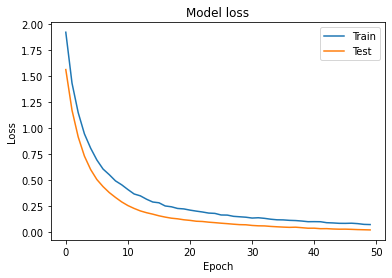

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

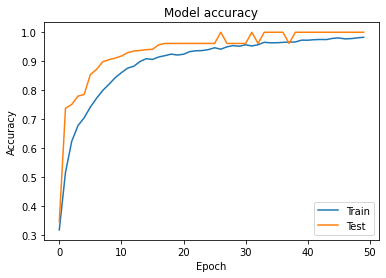

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [159]:
y_pred = model.predict(X_test)

#threshold = 0.5
ypred = (y_pred > 0.5).astype(int)
predicted = pd.DataFrame(ypred)

rename = predicted.rename(columns={0: 'Brunei',
                        1: 'Cambodi',
                        2: 'Indonesia',
                        3: 'Laos',
                        4: 'Malaysia',
                        5: 'Myanmar',
                        6: 'Philippines',
                        7: 'Singapore',
                        8: 'Thailand',
                        9: 'Vietnam'})
rename

,Brunei,Cambodi,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1674,0,0,0,0,0,0,0,0,0,1
1675,1,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,1,0,0,0
1677,0,0,0,0,0,0,1,0,0,0


In [158]:
y_pred, predicted 

(array([[6.8600086e-18, 9.0452470e-04, 3.1681088e-04, ..., 1.9911301e-09,
         8.0467435e-04, 9.9797028e-01],
        [1.8033686e-14, 1.1957081e-04, 2.5593150e-05, ..., 3.9626972e-05,
         9.9844390e-01, 1.7774690e-04],
        [7.3831324e-10, 1.9480129e-03, 7.6011748e-09, ..., 2.5271294e-08,
         6.3469160e-12, 1.2140915e-09],
        ...,
        [3.9836264e-04, 2.0359211e-07, 1.8568965e-02, ..., 1.7034201e-07,
         7.3380654e-08, 1.4288155e-06],
        [3.3620345e-05, 2.1512781e-08, 2.5639154e-03, ..., 1.0098697e-08,
         1.4090509e-09, 5.9931395e-08],
        [6.5403414e-04, 2.3856123e-07, 2.2012939e-06, ..., 1.5078728e-04,
         2.2274716e-04, 6.1940149e-08]], dtype=float32),
       0  1  2  3  4  5  6  7  8  9
 0     0  0  0  0  0  0  0  0  0  1
 1     0  0  0  0  0  0  0  0  1  0
 2     0  0  0  0  0  1  0  0  0  0
 3     0  0  0  0  0  1  0  0  0  0
 4     0  1  0  0  0  0  0  0  0  0
 ...  .. .. .. .. .. .. .. .. .. ..
 1674  0  0  0  0  0  0  0  0  0  

In [156]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat

array([9, 8, 5, ..., 6, 6, 4], dtype=int64)

In [157]:
ds = pd.DataFrame(y_pred_cat)
d = ds.rename(columns={0:'class'})
pred = class_names[d]
pr = pd.DataFrame(pred)
pr2 = pr.rename(columns={0:'ข้อมูลพยากรณ์'})
pr2

C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\681577908.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = class_names[d]


,ข้อมูลพยากรณ์
0,Vietnam
1,Thailand
2,Myanmar
3,Myanmar
4,Cambodia
...,...
1674,Vietnam
1675,Brunei
1676,Philippines
1677,Philippines


##### class_names[] ใช้กำหนด class ให้กับ y_test ซึ่ง class_names[] เป็นตัวแปรที่ใช้แปลงค่า class ที่เป็นชื่อประเทศ ให้เป็นตัวเลข (0,1,2,3...n) ด้วยฟังก์ชัน pd.factorize() เช่น  y, class_names = pd.factorize(y) ที่ได้แปลงค่าไว้แล้วตั้งแต่แรก
##### np.argmax() ฟังก์ชันใช้ตรวจสอบค่าความเชื่อมั่นว่า class ใดมีค่ามากที่สุด แล้วก็จะเลือก class นั้นมาเพียง class เดียวในแถวนั้น เช่น y_test2 แสดงผลเป็น array([0, 0, 5, ..., 7, 5, 5], dtype=int64)

In [98]:
ytest1 = class_names[y_test]
ytest2 = np.argmax(ytest1, axis=1)
ytest3 = pd.DataFrame(ytest2)
ytest4 = class_names[ytest3]
ytest5 = pd.DataFrame(ytest4)
ytest6 = ytest5.rename(columns={0:'ข้อมูลจริง'})
ytest6

C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\1203826910.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ytest1 = class_names[y_test]
C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\1203826910.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ytest4 = class_names[ytest3]


,ข้อมูลจริง
0,Thailand
1,Cambodia
2,Laos
3,Singapore
4,Vietnam
...,...
1674,Brunei
1675,Brunei
1676,Brunei
1677,Indonesia


In [99]:
t = pd.concat([ytest6, pr2], axis=1)
t

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,Thailand,Thailand
1,Cambodia,Cambodia
2,Laos,Laos
3,Singapore,Singapore
4,Vietnam,Vietnam
...,...,...
1674,Brunei,Brunei
1675,Brunei,Brunei
1676,Brunei,Brunei
1677,Indonesia,Indonesia


In [100]:
Xtest1 = pd.DataFrame(X_test)
df1 = Xtest1.rename(columns={0: 'life_expectancy',
                             1: 'human_development_index',
                             2: 'total_cases',
                             3: 'total_deaths'})
df1

,life_expectancy,human_development_index,total_cases,total_deaths
0,0.622378,0.282216,-0.493637,-0.405410
1,-0.933824,-1.458269,-0.393726,-0.306058
2,-1.337205,-1.277563,-0.513467,-0.408558
3,1.995996,1.813462,-0.437108,-0.406404
4,0.250842,-0.412076,-0.520176,-0.407398
...,...,...,...,...
1674,0.348503,0.862377,-0.521710,-0.408723
1675,0.348503,0.862377,-0.521646,-0.408723
1676,0.348503,0.862377,-0.521710,-0.408806
1677,-0.530443,-0.278924,4.026214,5.031770


In [101]:
smt = pd.concat([df1, t], axis=1)
smt 

,life_expectancy,human_development_index,total_cases,total_deaths,ข้อมูลจริง,ข้อมูลพยากรณ์
0,0.622378,0.282216,-0.493637,-0.405410,Thailand,Thailand
1,-0.933824,-1.458269,-0.393726,-0.306058,Cambodia,Cambodia
2,-1.337205,-1.277563,-0.513467,-0.408558,Laos,Laos
3,1.995996,1.813462,-0.437108,-0.406404,Singapore,Singapore
4,0.250842,-0.412076,-0.520176,-0.407398,Vietnam,Vietnam
...,...,...,...,...,...,...
1674,0.348503,0.862377,-0.521710,-0.408723,Brunei,Brunei
1675,0.348503,0.862377,-0.521646,-0.408723,Brunei,Brunei
1676,0.348503,0.862377,-0.521710,-0.408806,Brunei,Brunei
1677,-0.530443,-0.278924,4.026214,5.031770,Indonesia,Indonesia


##### การประเมิน model ด้วย mean_squared_error (MSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), mean_absolute_error (MAE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), root mean_squared_error (RMSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), r2_score (R-squred: ค่าเข้าใกล้ 1 เป็นค่าที่ดี)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('% of accuracy:ค่าร้อยละของความแม่นยำ =', r2_score(y_test, y_pred))
print('MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ =',mean_absolute_error(y_test, y_pred))
print('MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', mean_squared_error(y_test, y_pred)) 
print('RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', np.sqrt(mean_squared_error(y_test, y_pred)))

% of accuracy:ค่าร้อยละของความแม่นยำ = 0.9967155474907881
MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ = 0.00328642
MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.00024054796
RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.015509608


##### การบันทึก model เอาไว้ใช้งาน 

In [103]:
model.save('mymodel.h5')
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


##### การโหลด model มาใช้งาน

In [104]:
#my_model.get_config()
from tensorflow.keras.models import load_model
my_model = load_model('mymodel.h5')

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [105]:
new_model = load_model('my_model')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


##### การนำโมเดลที่บันทึกไว้มา train ใหม่อีกครั้ง 

In [106]:
history = new_model.fit(X_train, y_train, 
                    epochs=50, batch_size=10, 
                    verbose=1, validation_split=0.25,
                    shuffle=True) #validation_data=(X_test,y_test)

Epoch 1/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9802 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 2/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9881 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 3/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9830 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9840 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 5/50
294/294 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9874 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 6/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9850 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/50
294/294 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9884 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 

##### การบันทึก scaler และ class names

In [107]:
import pickle

pickle.dump(sc, open('scaler.pkl', 'wb'))

##### การบันทึกเก็บข้อมูล class_names ชื่อประเทศในกลุ่มประเทศ AEC ที่นำมาใช้ในการศึกษา

In [108]:
file_name = 'classname.pkl'

open_file = open(file_name, 'wb')
pickle.dump(class_names, open_file)
open_file.close()

##### การโหลด Scaler เพื่อนำมาใช้งาน

In [109]:
import pickle 
sc2 = pickle.load(open('./scaler.pkl', 'rb'))

##### โหลด class_names ของกลุ่มประเทศ AEC 

In [110]:
file_name = 'classname.pkl'

open_file = open(file_name, 'rb')
class_names = pickle.load(open_file)
open_file.close()
class_names

Index(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
      dtype='object')

##### การนำ model มาใช้งานต้องปรับข้อมูลให้เป็น StandardScale ดังนี้ 

In [111]:
X_input = sc2.fit_transform(X_test)
X_input

array([[ 0.63285044,  0.28675264, -0.49162228, -0.40322538],
       [-0.91946066, -1.45393716, -0.39769984, -0.31162649],
       [-1.32183325, -1.27320981, -0.51026378, -0.40612722],
       ...,
       [ 0.35966063,  0.86698257, -0.51801267, -0.40635631],
       [-0.51708807, -0.27445336,  3.75729616,  4.60966611],
       [-0.51708807, -0.27445336,  3.95657196,  5.08449887]])

In [112]:
y_pred1 = my_model.predict(X_input)
y_pd = (y_pred1 > 0.5).astype(int)
ypd = pd.DataFrame(y_pd)
ypd 


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1674,1,0,0,0,0,0,0,0,0,0
1675,1,0,0,0,0,0,0,0,0,0
1676,1,0,0,0,0,0,0,0,0,0
1677,0,0,1,0,0,0,0,0,0,0


In [113]:
s = pd.DataFrame(class_names)
s.T

,0,1,2,3,4,5,6,7,8,9
0,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam


In [114]:
y_pd_cat = np.argmax(y_pd, axis=1)
ypd_cat = pd.DataFrame(y_pd_cat)
yp_cat = class_names[ypd_cat]
ypc = pd.DataFrame(yp_cat)
data = ypc.rename(columns={0:'ข้อมูลพยากรณ์'})
data 

C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\184107670.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  yp_cat = class_names[ypd_cat]


,ข้อมูลพยากรณ์
0,Thailand
1,Cambodia
2,Laos
3,Singapore
4,Vietnam
...,...
1674,Brunei
1675,Brunei
1676,Brunei
1677,Indonesia


##### class_names[] ใช้กำหนด class ให้กับ y_test ซึ่ง class_names[] เป็นตัวแปรที่ใช้แปลงค่า class ที่เป็นชื่อประเทศ ให้เป็นตัวเลข (0,1,2,3...n) ด้วยฟังก์ชัน pd.factorize() เช่น  y, class_names = pd.factorize(y) ที่ได้แปลงค่าไว้แล้วตั้งแต่แรก
##### np.argmax() ฟังก์ชันใช้ตรวจสอบค่าความเชื่อมั่นว่า class ใดมีค่ามากที่สุด แล้วก็จะเลือก class นั้นมาเพียง class เดียวในแถวนั้น เช่น y_test2 แสดงผลเป็น array([0, 0, 5, ..., 7, 5, 5], dtype=int64)

In [115]:
y_test1 = class_names[y_test]
y_test2 = np.argmax(y_test1, axis=1)
y_test3 = pd.DataFrame(y_test2)
y_test4 = class_names[y_test3]
y_test5 = pd.DataFrame(y_test4)
df = y_test5.rename(columns={0:'ข้อมูลจริง'})
df 

C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\1282408019.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test1 = class_names[y_test]
C:\Users\Techatach\AppData\Local\Temp\ipykernel_18592\1282408019.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test4 = class_names[y_test3]


,ข้อมูลจริง
0,Thailand
1,Cambodia
2,Laos
3,Singapore
4,Vietnam
...,...
1674,Brunei
1675,Brunei
1676,Brunei
1677,Indonesia


In [116]:
ts = pd.concat([df, data], axis=1)
ts 

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,Thailand,Thailand
1,Cambodia,Cambodia
2,Laos,Laos
3,Singapore,Singapore
4,Vietnam,Vietnam
...,...,...
1674,Brunei,Brunei
1675,Brunei,Brunei
1676,Brunei,Brunei
1677,Indonesia,Indonesia


In [117]:
n2 = pd.DataFrame(X_test)
n2

,0,1,2,3
0,0.622378,0.282216,-0.493637,-0.405410
1,-0.933824,-1.458269,-0.393726,-0.306058
2,-1.337205,-1.277563,-0.513467,-0.408558
3,1.995996,1.813462,-0.437108,-0.406404
4,0.250842,-0.412076,-0.520176,-0.407398
...,...,...,...,...
1674,0.348503,0.862377,-0.521710,-0.408723
1675,0.348503,0.862377,-0.521646,-0.408723
1676,0.348503,0.862377,-0.521710,-0.408806
1677,-0.530443,-0.278924,4.026214,5.031770


In [118]:
sum = pd.concat([n2, ts], axis=1)
df2 = sum.rename(columns={0: 'life_expectancy',
                          1: 'human_development_index',
                          2: 'total_cases',
                          3: 'total_deaths'})
df2

,life_expectancy,human_development_index,total_cases,total_deaths,ข้อมูลจริง,ข้อมูลพยากรณ์
0,0.622378,0.282216,-0.493637,-0.405410,Thailand,Thailand
1,-0.933824,-1.458269,-0.393726,-0.306058,Cambodia,Cambodia
2,-1.337205,-1.277563,-0.513467,-0.408558,Laos,Laos
3,1.995996,1.813462,-0.437108,-0.406404,Singapore,Singapore
4,0.250842,-0.412076,-0.520176,-0.407398,Vietnam,Vietnam
...,...,...,...,...,...,...
1674,0.348503,0.862377,-0.521710,-0.408723,Brunei,Brunei
1675,0.348503,0.862377,-0.521646,-0.408723,Brunei,Brunei
1676,0.348503,0.862377,-0.521710,-0.408806,Brunei,Brunei
1677,-0.530443,-0.278924,4.026214,5.031770,Indonesia,Indonesia
